<a href="https://colab.research.google.com/github/alyhussein86/491a6bOsXMz9HvMv/blob/main/Term_Deposit_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# from pandas.core.base import value_counts
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
# from imblearn.over_sampling import SMOTE

## Importing the dataset

In [2]:
dataset = pd.read_csv('term-deposit-marketing-2020.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


## Encoding categorical data

In [3]:
dataset['y'] = dataset['y'].map(lambda x: 0 if x == 'no' else 1)
dataset['default'] = dataset['default'].map(lambda x: 0 if x == 'no' else 1)
dataset['housing'] = dataset['housing'].map(lambda x: 0 if x == 'no' else 1)
dataset['loan'] = dataset['loan'].map(lambda x: 0 if x == 'no' else 1)

In [4]:
print(dataset.head())

print(dataset.info())

print(dataset['y'].value_counts())

   age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day month  duration  campaign  y  
0  unknown    5   may       261         1  0  
1  unknown    5   may       151         1  0  
2  unknown    5   may        76         1  0  
3  unknown    5   may        92         1  0  
4  unknown    5   may       198         1  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-nul

In [5]:
np.unique(dataset['education'])

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [6]:
categorical_columns_subset = [
    "job",
    "marital",
    "education",
    "contact",
    "month"
    ]

numerical_columns_subset = [
    "age",
    "default",
    "balance",
    "housing",
    "loan",
    "day",
    "duration",
    "campaign","y"
    ]


In [7]:
X = dataset[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

categorical_columns = X.select_dtypes(include="category").columns
n_categorical_features = len(categorical_columns)
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

Number of samples: 40000
Number of features: 14
Number of categorical features: 5
Number of numerical features: 9


In [8]:
X.head()

,job,marital,education,contact,month,age,default,balance,housing,loan,day,duration,campaign,y
0,management,married,tertiary,unknown,may,58,0,2143,1,0,5,261,1,0
1,technician,single,secondary,unknown,may,44,0,29,1,0,5,151,1,0
2,entrepreneur,married,secondary,unknown,may,33,0,2,1,1,5,76,1,0
3,blue-collar,married,unknown,unknown,may,47,0,1506,1,0,5,92,1,0
4,unknown,single,unknown,unknown,may,33,0,1,0,0,5,198,1,0


In [9]:
features = X.drop(columns=['y'])
y = dataset.iloc[:, -1]

In [10]:
print(features.head(), y.head(), features.shape, y.shape)

            job  marital  education  contact month  age  default  balance  \
0    management  married   tertiary  unknown   may   58        0     2143   
1    technician   single  secondary  unknown   may   44        0       29   
2  entrepreneur  married  secondary  unknown   may   33        0        2   
3   blue-collar  married    unknown  unknown   may   47        0     1506   
4       unknown   single    unknown  unknown   may   33        0        1   

   housing  loan  day  duration  campaign  
0        1     0    5       261         1  
1        1     0    5       151         1  
2        1     1    5        76         1  
3        1     0    5        92         1  
4        0     0    5       198         1   0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64 (40000, 13) (40000,)


##**Creating Histogram**

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'housing'}>],
       [<Axes: title={'center': 'loan'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>]], dtype=object)

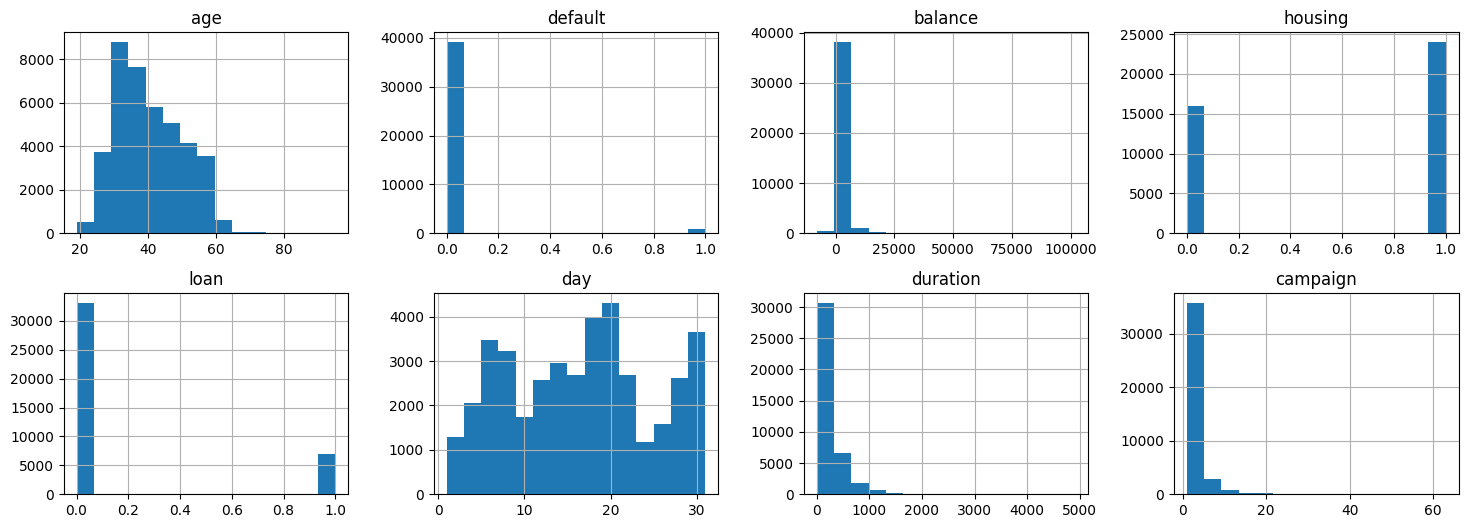

In [11]:
features.hist(bins=15, figsize=(18, 6), layout=(2, 4))

No huge correlation impact that affect the target results or perdictions

<ipython-input-12-6d69b7b4b1e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(features.corr(), annot = True, cmap="coolwarm")


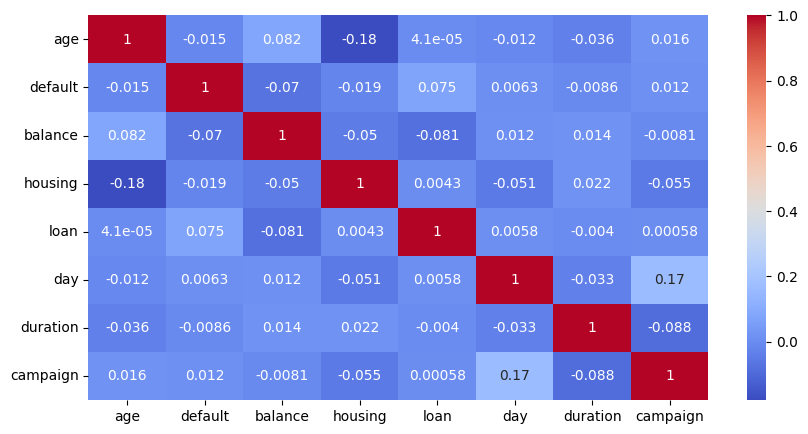

In [12]:
plt.figure(figsize = (10,5))
sns.heatmap(features.corr(), annot = True, cmap="coolwarm")
plt.show()

0    37104
1     2896
Name: y, dtype: int64


<Axes: >

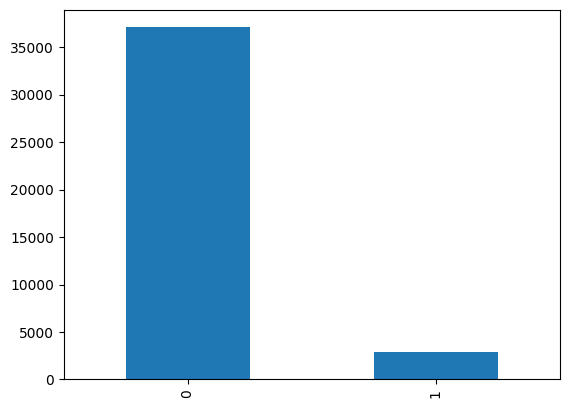

In [13]:
print(y.value_counts())

y.value_counts().plot(kind='bar')

## Encoding the Dependent Variable

In [14]:
ct = make_column_transformer(
    (OneHotEncoder(), make_column_selector(dtype_include="category")), remainder="passthrough")
features = ct.fit_transform(features)

In [15]:
features = pd.DataFrame(features)
print(features.head())
features.shape

    0    1    2    3    4    5    6    7    8    9   ...   31   32    33   34  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  58.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  44.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  33.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  47.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  33.0  0.0   

       35   36   37   38     39   40  
0  2143.0  1.0  0.0  5.0  261.0  1.0  
1    29.0  1.0  0.0  5.0  151.0  1.0  
2     2.0  1.0  1.0  5.0   76.0  1.0  
3  1506.0  1.0  0.0  5.0   92.0  1.0  
4     1.0  0.0  0.0  5.0  198.0  1.0  

[5 rows x 41 columns]


(40000, 41)

## Splitting the dataset into the Training set and Test set

In [16]:
X_train, X_test,  y_train, y_test = train_test_split(features, y.values, test_size = 0.2, random_state = 1)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32000, 41) (8000, 41) (32000,) (8000,)


In [18]:
X_train= pd.DataFrame(X_train)
print(X_train.head())
X_train.shape

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33  \
21721  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0   
15576  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  41.0   
28716  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  27.0   
204    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  35.0   
36677  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  46.0   

        34     35   36   37    38     39   40  
21721  0.0  268.0  0.0  0.0  19.0  255.0  1.0  
15576  0.0   98.0  0.0  1.0  21.0   97.0  6.0  
28716  0.0  116.0  0.0  0.0  30.0   46.0  1.0  
204    0.0    0.0  1.0  0.0   5.0  471.0  1.0  
36677  0.0  147.0  1.0  0.0  12.0  189.0  1.0  

[5 rows x 41 columns]


(32000, 41)

In [19]:
# ct_test = make_column_transformer(
#     (OneHotEncoder, make_column_selector(dtype_include="category")), remainder="passthrough")
# X_test = ct_test.fit_transform(X_test)

X_test = pd.DataFrame(X_test)
print(X_test.head())
X_test.shape

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33  \
3841   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  57.0   
12898  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  49.0   
15032  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  37.0   
36781  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0   
9201   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  40.0   

        34      35   36   37    38     39   40  
3841   0.0   260.0  1.0  0.0  16.0   38.0  3.0  
12898  1.0  -354.0  0.0  1.0   7.0  455.0  1.0  
15032  1.0     0.0  1.0  0.0  17.0  158.0  1.0  
36781  0.0   177.0  1.0  1.0  12.0   22.0  8.0  
9201   0.0  1779.0  1.0  0.0   5.0   59.0  7.0  

[5 rows x 41 columns]


(8000, 41)

In [20]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(y_dummy_pred)))

# checking accuracy
print('Test score: {:.2f} %'.format(accuracy_score(y_test, y_dummy_pred)*100))

Unique predicted labels:  [0 1]
Test score: 86.65 %


In [21]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, y_dummy_pred)*100))

F1_score: 6.48 %


In [22]:
pd.DataFrame(confusion_matrix(y_test, y_dummy_pred))

,0,1
0,6895,540
1,528,37


In [23]:
y_pred_proba = dummy.predict_proba(X_test)

In [24]:
print(pd.DataFrame(y_pred_proba))

        0    1
0     1.0  0.0
1     1.0  0.0
2     1.0  0.0
3     0.0  1.0
4     1.0  0.0
...   ...  ...
7995  1.0  0.0
7996  1.0  0.0
7997  1.0  0.0
7998  1.0  0.0
7999  1.0  0.0

[8000 rows x 2 columns]


#**Modeling and selection**

##**Logistic Regression**

In [25]:
lg = LogisticRegression(solver='newton-cg')
lg.fit(X_train, y_train)

y_pred_lg = lg.predict(X_test)

print(y_pred_lg)
print('Test score: {:.2f} %'.format(accuracy_score(y_test, y_pred_lg)*100))

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[0 0 0 ... 0 0 0]
Test score: 93.75 %


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [26]:
predictions = pd.DataFrame(y_pred_lg)
predictions[0].value_counts()

0    7739
1     261
Name: 0, dtype: int64

In [27]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, y_pred_lg)*100))

F1_score: 39.47 %


In [28]:
print('Recall: {:.2f} %'.format(recall_score(y_test, y_pred_lg)*100))

Recall: 28.85 %


In [29]:
pd.DataFrame(confusion_matrix(y_test,y_pred_lg))

,0,1
0,7337,98
1,402,163


In [30]:
y_pred_proba_lg = lg.predict_proba(X_test)

In [31]:
print(pd.DataFrame(y_pred_proba_lg))

             0         1
0     0.998595  0.001405
1     0.943511  0.056489
2     0.985445  0.014555
3     0.989305  0.010695
4     0.996166  0.003834
...        ...       ...
7995  0.961503  0.038497
7996  0.974109  0.025891
7997  0.981463  0.018537
7998  0.982378  0.017622
7999  0.955202  0.044798

[8000 rows x 2 columns]


In [32]:
params = {'C':[0.1,0.01,0.02,0.3,0.0015,1], 'solver':["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
grid_search_lg = GridSearchCV(estimator= lg, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_lg.fit(X_train, y_train)
best_accuracy_lg = grid_search_lg.best_score_
best_params_lg = grid_search_lg.best_params_
print("Best F1_Score for Logistisc regression: {:.2f}%".format(best_accuracy_lg*100))
print("Best params for Logistisc regression: ",best_params_lg)

Best F1_Score for Logistisc regression: 38.22%
Best params for Logistisc regression:  {'C': 1, 'solver': 'liblinear'}



##**RandomForest Classifier**

In [33]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, rfc_pred)*100))

Accuracy score: 93.47 %


In [34]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, rfc_pred)*100))

F1_score: 36.50 %


In [35]:
print('Recall: {:.2f} %'.format(recall_score(y_test, rfc_pred)*100))

Recall: 26.55 %


In [36]:
y_pred_proba_rfc = rfc.predict_proba(X_test)

In [37]:
print(pd.DataFrame(y_pred_proba_rfc))

        0    1
0     1.0  0.0
1     0.7  0.3
2     1.0  0.0
3     1.0  0.0
4     1.0  0.0
...   ...  ...
7995  1.0  0.0
7996  1.0  0.0
7997  1.0  0.0
7998  1.0  0.0
7999  1.0  0.0

[8000 rows x 2 columns]


In [38]:
params = {'n_estimators': [10, 20, 25, 50, 100], 'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_rd = GridSearchCV(estimator= rfc, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_rd.fit(X_train, y_train)
best_accuracy_rd = grid_search_rd.best_score_
best_params_rd = grid_search_rd.best_params_
print("Best F1_Score for RandomForest: {:.2f}%".format(best_accuracy_rd*100))
print("Best params for RandomForest: ",best_params_rd)

Best F1_Score for RandomForest: 42.15%
Best params for RandomForest:  {'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 25}


##**Decision Tree**

In [39]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_split= 2, splitter="random", random_state=0)
dtc.fit(X_train, y_train)

y_pred_dt = dtc.predict(X_test)

print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_dt)*100))

Accuracy score: 93.62 %


In [40]:
print('F1_score: {:.2f} %'.format(f1_score(y_test, y_pred_dt)*100))

F1_score: 35.93 %


In [41]:
print('Recall: {:.2f} %'.format(recall_score(y_test, y_pred_dt)*100))

Recall: 25.31 %


In [42]:
y_pred_proba_dt = dtc.predict_proba(X_test)

In [43]:
print(pd.DataFrame(y_pred_proba_dt))

             0         1
0     0.994334  0.005666
1     0.762063  0.237937
2     0.994334  0.005666
3     0.994334  0.005666
4     0.994334  0.005666
...        ...       ...
7995  0.899083  0.100917
7996  0.994334  0.005666
7997  0.994334  0.005666
7998  0.994334  0.005666
7999  0.987952  0.012048

[8000 rows x 2 columns]


In [44]:
params = {'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'splitter':["random","best"], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_dt = GridSearchCV(estimator= dtc, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_dt.fit(X_train, y_train)
best_accuracy_dt = grid_search_dt.best_score_
best_params_dt = grid_search_dt.best_params_
print("Best F1_Score for DecisionTree: {:.2f}%".format(best_accuracy_dt*100))
print("Best params for DecisionTree: ",best_params_dt)

Best F1_Score for DecisionTree: 47.39%
Best params for DecisionTree:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 12, 'splitter': 'best'}


##**Oversampling**

###**Resampling**

In [45]:
y_0 = X[X.y==0]
y_1 = X[X.y==1]

# upsample minority
y_upsampled = resample(y_1,
                          replace=True, # sample with replacement
                          n_samples=len(y_0), # match number in majority class
                          random_state=1) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([y_0, y_upsampled])

# check new class counts
upsampled.y.value_counts()

0    37104
1    37104
Name: y, dtype: int64

In [46]:
y_train = upsampled.y
X_train = upsampled.drop('y', axis=1)

In [47]:
ct = make_column_transformer(
    (OneHotEncoder(), make_column_selector(dtype_include="category")), remainder="passthrough")
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
print(X_train.head())
X_train.shape

    0    1    2    3    4    5    6    7    8    9   ...   31   32    33   34  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  58.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  44.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  33.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  47.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  33.0  0.0   

       35   36   37   38     39   40  
0  2143.0  1.0  0.0  5.0  261.0  1.0  
1    29.0  1.0  0.0  5.0  151.0  1.0  
2     2.0  1.0  1.0  5.0   76.0  1.0  
3  1506.0  1.0  0.0  5.0   92.0  1.0  
4     1.0  0.0  0.0  5.0  198.0  1.0  

[5 rows x 41 columns]


(74208, 41)

In [48]:
X_test = pd.DataFrame(X_test)
print(X_test.head())
X_test.shape

    0    1    2    3    4    5    6    7    8    9   ...   31   32    33   34  \
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  57.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  49.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  37.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  40.0  0.0   

       35   36   37    38     39   40  
0   260.0  1.0  0.0  16.0   38.0  3.0  
1  -354.0  0.0  1.0   7.0  455.0  1.0  
2     0.0  1.0  0.0  17.0  158.0  1.0  
3   177.0  1.0  1.0  12.0   22.0  8.0  
4  1779.0  1.0  0.0   5.0   59.0  7.0  

[5 rows x 41 columns]


(8000, 41)

###**Logistic Regression (Upsampling)**

In [49]:
upsampled = LogisticRegression(solver='liblinear')
upsampled.fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [50]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, upsampled_pred)*100))

Accuracy score: 87.58 %


In [51]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, upsampled_pred)*100))

F1 score: 49.75 %


In [52]:
print(pd.DataFrame(confusion_matrix(y_test,upsampled_pred)))

      0    1
0  6514  921
1    73  492


In [53]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, upsampled_pred)*100))

Recall score: 87.08 %


In [54]:
upsampled_pred_proba = upsampled.predict_proba(X_test)

In [55]:
print(pd.DataFrame(upsampled_pred_proba))

             0         1
0     0.995862  0.004138
1     0.638064  0.361936
2     0.934278  0.065722
3     0.958046  0.041954
4     0.980507  0.019493
...        ...       ...
7995  0.738240  0.261760
7996  0.877079  0.122921
7997  0.929283  0.070717
7998  0.911778  0.088222
7999  0.688855  0.311145

[8000 rows x 2 columns]


###**Decision Tree (Upsampling)**

In [56]:
upsampled_dt = DecisionTreeClassifier(criterion='entropy', max_depth=6,min_samples_split= 2, splitter="random", random_state=0)
upsampled_dt.fit(X_train, y_train)

upsampled_pred_dt = upsampled_dt.predict(X_test)

In [57]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, upsampled_pred_dt)*100))

Accuracy score: 79.64 %


In [58]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, upsampled_pred_dt)*100))

F1 score: 39.10 %


In [59]:
print(pd.DataFrame(confusion_matrix(y_test,upsampled_pred_dt)))

      0     1
0  5848  1587
1    42   523


In [60]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, upsampled_pred_dt)*100))

Recall score: 92.57 %


In [61]:
upsampled_pred_proba_dt = upsampled_dt.predict_proba(X_test)

In [62]:
print(pd.DataFrame(upsampled_pred_proba_dt))

             0         1
0     0.993014  0.006986
1     0.178448  0.821552
2     0.988471  0.011529
3     0.782875  0.217125
4     0.959938  0.040062
...        ...       ...
7995  0.782875  0.217125
7996  0.987697  0.012303
7997  0.987697  0.012303
7998  1.000000  0.000000
7999  0.782875  0.217125

[8000 rows x 2 columns]


###**Random Forest (Upsampling)**

In [63]:
upsampled_rfc = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=14, min_samples_split=8, random_state=0)
upsampled_rfc.fit(X_train, y_train)

upsampled_pred_rfc = upsampled_rfc.predict(X_test)

In [64]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, upsampled_pred_rfc)*100))

Accuracy score: 92.03 %


In [65]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, upsampled_pred_rfc)*100))

F1 score: 63.50 %


In [66]:
print(pd.DataFrame(confusion_matrix(y_test,upsampled_pred_rfc)))

      0    1
0  6807  628
1    10  555


In [67]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, upsampled_pred_rfc)*100))

Recall score: 98.23 %


In [68]:
upsampled_pred_proba_rfc = upsampled_rfc.predict_proba(X_test)

In [69]:
print(pd.DataFrame(upsampled_pred_proba_rfc))

             0         1
0     0.989942  0.010058
1     0.519093  0.480907
2     0.929274  0.070726
3     0.983352  0.016648
4     0.976780  0.023220
...        ...       ...
7995  0.739718  0.260282
7996  0.894933  0.105067
7997  0.910906  0.089094
7998  0.954486  0.045514
7999  0.824434  0.175566

[8000 rows x 2 columns]


###**SVM Classifier (Upsampling)**

In [70]:
sv = SVC(kernel="rbf", random_state=0)
sv.fit(X_train,y_train)

y_pred_sv = sv.predict(X_test)

In [71]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_sv)*100))

Accuracy score: 83.76 %


In [72]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, y_pred_sv)*100))

F1 score: 39.33 %


In [73]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred_sv)))

      0     1
0  6280  1155
1   144   421


In [74]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, y_pred_sv)*100))

Recall score: 74.51 %


In [75]:
upsampled_pred_proba_sv = sv.predict_proba(X_test)

AttributeError: ignored

In [ ]:
print(pd.DataFrame(upsampled_pred_proba_sv))

###**XGBoost Classifier (Upsampling)**

In [ ]:
xg = XGBClassifier()
xg.fit(X_train,y_train)

y_pred_xg = xg.predict(X_test)

In [ ]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_xg)*100))

In [ ]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, y_pred_xg)*100))

In [ ]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred_xg)))

In [ ]:
upsampled_pred_proba_xg = xg.predict_proba(X_test)

In [ ]:
print(pd.DataFrame(upsampled_pred_proba_xg))

#**Cross Vaidation using GridSearch**

##**Logistic Regression Upsampling Cross Validation**

In [ ]:
params = {'C':[0.1,0.01,0.02,0.3,0.0015,1], 'solver':["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
grid_search_Ulg = GridSearchCV(estimator= upsampled, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_Ulg.fit(X_train, y_train)
best_accuracy_Ulg = grid_search_Ulg.best_score_
best_params_Ulg = grid_search_Ulg.best_params_
print("Best F1_Score for Upsampling Logistisc regression: {:.2f}%".format(best_accuracy_Ulg*100))
print("Best params for Upsampling Logistisc regression: ",best_params_Ulg)

In [ ]:
accuracies_Ulg = cross_val_score(estimator = upsampled, X = X_train, y = y_train, cv = 5)
print("Upsampled Logistic Regression Accuracy: {:.2f} %".format(accuracies_Ulg.mean()*100))
print("Upsampled Logistic Regression Standard Deviation: {:.2f} %".format(accuracies_Ulg.std()*100))

##**DecisionTree Upsampling Cross Validation**

In [ ]:
params = {'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'splitter':["random","best"], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_dt = GridSearchCV(estimator= upsampled_dt, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_dt.fit(X_train, y_train)
best_accuracy_dt = grid_search_dt.best_score_
best_params_dt = grid_search_dt.best_params_
print("Best Accuracy for DecisionTree: {:.2f}%".format(best_accuracy_dt*100))
print("Best params for DecisionTree: ",best_params_dt)

In [ ]:
accuracies_Udt = cross_val_score(estimator = upsampled_dt, X = X_train, y = y_train, cv = 5)
print("Upsampled DecisionTree Accuracy: {:.2f} %".format(accuracies_Udt.mean()*100))
print("Upsampled DecisionTree Standard Deviation: {:.2f} %".format(accuracies_Udt.std()*100))

##**RandomForest Upsampling Cross Validation**

In [ ]:
params = {'n_estimators': [10, 20, 25, 50, 100], 'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_rd = GridSearchCV(estimator= upsampled_rfc, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_rd.fit(X_train, y_train)
best_accuracy_rd = grid_search_rd.best_score_
best_params_rd = grid_search_rd.best_params_
print("Best Accuracy for RandomForest: {:.2f}%".format(best_accuracy_rd*100))
print("Best params for RandomForest: ",best_params_rd)

In [ ]:
accuracies_Urfc = cross_val_score(estimator = upsampled_rfc, X = X_train, y = y_train, cv = 5)
print("Upsampled Random Forest Accuracy: {:.2f} %".format(accuracies_Urfc.mean()*100))
print("Upsampled Random Forest Standard Deviation: {:.2f} %".format(accuracies_Urfc.std()*100))

##**SVC Upsampling Cross Validation**

In [ ]:
params = {'kernel': ["linear","poly", "rbf", "sigmoid"],'gamma':["scale"], 'decision_function_shape' : ["ovo"]}
grid_search_sv = GridSearchCV(estimator= sv, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_sv.fit(X_train, y_train)
best_accuracy_sv = grid_search_sv.best_score_
best_params_sv = grid_search_sv.best_params_
print("Best Accuracy for SVM: {:.2f}%".format(best_accuracy_sv*100))
print("Best params for SVM: ",best_params_sv)

In [ ]:
accuracies_Usv = cross_val_score(estimator = sv, X = X_train, y = y_train, cv = 5)
print("Upsampled SVM Accuracy: {:.2f} %".format(accuracies_Usv.mean()*100))
print("Upsampled SVM Standard Deviation: {:.2f} %".format(accuracies_Usv.std()*100))

##**Weighting**

In [ ]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)
print(model.feature_importances_)